In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from tensorflow.keras import backend as K
img_width, img_height = 64, 64
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

Using TensorFlow backend.


In [6]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the CNN to the images

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('E:\\Machine_Learning_Models\\covid-images\\training',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('E:\\Machine_Learning_Models\\covid-images\\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 3,
                         validation_data = test_set,
                         validation_steps = 50)

Found 417 images belonging to 2 classes.
Found 68 images belonging to 2 classes.
Epoch 1/3
200/200 [==============================] - 144s 722ms/step - loss: 0.2671 - accuracy: 0.9033 - val_loss: 0.4119 - val_accuracy: 0.8967
Epoch 2/3
200/200 [==============================] - 139s 694ms/step - loss: 0.1380 - accuracy: 0.9468 - val_loss: 0.2449 - val_accuracy: 0.8967
Epoch 3/3
200/200 [==============================] - 143s 717ms/step - loss: 0.1224 - accuracy: 0.9545 - val_loss: 0.1936 - val_accuracy: 0.9115


In [7]:
##Save model to json
import os
from keras.models import model_from_json

clssf = classifier.to_json()
with open("Covid.json", "w") as json_file:
    json_file.write(clssf)
classifier.save("Covid.h5")
print("model saved to disk....")

model saved to disk....


0.jpeg: normal
1.jpeg: normal
10.jpeg: normal
100.jpeg: normal
101.jpeg: normal
102.jpeg: normal
103.jpeg: normal
104.jpeg: normal
105.jpeg: normal
106.jpeg: normal
107.jpeg: normal
108.jpeg: normal
109.jpeg: normal
11.jpeg: normal
110.jpeg: normal
111.jpeg: normal
112.jpeg: normal
113.jpeg: normal
114.jpeg: normal
115.jpeg: normal
116.jpeg: normal
117.jpeg: normal
118.jpeg: normal
119.jpeg: normal
12.jpeg: normal
120.jpeg: normal
121.jpeg: normal
122.jpeg: normal
123.jpeg: normal
124.jpeg: normal
125.jpeg: normal
126.jpeg: normal
127.jpeg: normal
128.jpeg: normal
129.jpeg: normal
13.jpeg: normal
130.jpeg: normal
131.jpeg: normal
132.jpeg: normal
133.jpeg: normal
134.jpeg: normal
135.jpeg: normal
136.jpeg: normal
137.jpeg: normal
138.jpeg: normal
139.jpeg: normal
14.jpeg: normal
140.jpeg: normal
141.jpeg: normal
142.jpeg: normal
143.jpeg: normal
144.jpeg: normal
145.jpeg: normal
146.jpeg: normal
147.jpeg: normal
148.jpeg: normal
149.jpeg: normal
15.jpeg: normal
150.jpeg: normal
151.jpe

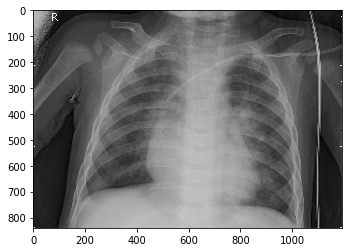

In [11]:
%matplotlib inline
from os import listdir
from os.path import isfile, join
import matplotlib.image as mpimg
mypath = "E:\\Machine_Learning_Models\\covid-images\\ValData\\ViralPneumonia\\"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

classifier=load_model('Covid.h5')
covid_counter=0
normal_counter=0
for file in onlyfiles:
    img = image.load_img(mypath+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x=x.reshape(64,64,3)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = classifier.predict_classes(images)
    pred_proba = "{:.3f}".format(np.amax(classes)*100)
#     print(classes)   
    if classes == 1:
        plt.imshow(mpimg.imread(mypath+file))
        print(file + ": " + 'normal')
        normal_counter += 1
    elif classes==0:
        plt.imshow(mpimg.imread(mypath+file))
        print(file + ": " + 'covid')
        covid_counter += 1
    
print("Total Covid :",covid_counter)
print("Total Normal :",normal_counter)

In [12]:
print(classifier.input)
print(classifier.output)

Tensor("conv2d_6_input_4:0", shape=(None, 64, 64, 3), dtype=float32)
Tensor("dense_7_4/Identity:0", shape=(None, 1), dtype=float32)
